<a href="https://colab.research.google.com/github/Natalie9/asteroides-astropy/blob/main/Asteroides_astropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from astropy.io import fits

In [2]:
# Abra o arquivo FITS
hdul = fits.open('files/XY64_p10/o60401g0279o.2085599.ch.2727040.XY64.p10.fits')

In [3]:
# Imprima informações sobre o arquivo FITS
hdul.info()

Filename: files/XY64_p10/o60401g0279o.2085599.ch.2727040.XY64.p10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  XY64.hdr      1 PrimaryHDU     623   (2423, 2434)   int16 (rescales to uint16)   


In [4]:
# Acesse os dados do arquivo FITS
img = hdul[0].data
print(img)

[[160 160 160 ... 160 160 160]
 [160 160 160 ... 160 160 160]
 [160 160 160 ... 160 160 160]
 ...
 [160 160 160 ... 160 160 160]
 [160 160 160 ... 160 160 160]
 [160 160 160 ... 160 160 160]]


In [5]:
header = hdul[0].header
print(header)

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                   16 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 2423 / length of data axis 1                          NAXIS2  =                 2434 / length of data axis 2                          BZERO   =               32768.                                                  BSCALE  =                   1.                                                  DATE-OBS= '2024-04-01T08:47:25.131128' /  UTC start of exposure                 TIMESYS = 'UTC     '           / Time scale                                     EQUINOX =                2000. /                                                EXPTIME =                  45. /  exposure time (sec)                           OBJCTRA = '13 19 29.497'       / RA of center of the image                      OBJCTDEC= '07 06 51.790'       / Dec of 

In [6]:
# Feche o arquivo FITS
hdul.close()

Entendendo o formato do arquivo e o que está contido nele que pode ser interessante para análise

No.: É o número de HDU. Neste caso, há apenas um HDU, então é listado como 0.

Name: É o nome do HDU. Neste caso, o nome é XY64.hdr.

Ver: Refere-se à versão do HDU. Para o HDU primário, a versão geralmente é 1.

Type: Indica o tipo de HDU. Neste caso, é um PrimaryHDU, o que significa que é o HDU primário do arquivo FITS.

Cards: É o número de cartões no cabeçalho. O cabeçalho contém metadados que descrevem os dados armazenados no HDU. No caso deste arquivo FITS, o cabeçalho contém 623 cartões.

Dimensions: São as dimensões dos dados armazenados no HDU. Neste exemplo, os dados têm dimensões de (2423, 2434), o que significa que é uma matriz bidimensional com 2423 linhas e 2434 colunas.

Format: Refere-se ao formato dos dados armazenados no HDU. No caso deste exemplo, os dados são armazenados como int16, o que significa que são números inteiros de 16 bits. Além disso, há uma indicação de que os dados são "rescaled to uint16", o que sugere que os dados podem ser reescalados para o tipo uint16 (números inteiros sem sinal de 16 bits) quando são lidos ou interpretados. Isso é comum para garantir que os dados estejam no formato correto para processamento ou visualização.

# 1. Análise exploratória dos dados

## Características da imagem

In [18]:
img.dtype # Tipo de dado

dtype('uint16')

In [19]:
img.shape # Tamanho da imagem

(2434, 2423)

In [20]:
img.size # Quantidade de dados (pixeis)

5897582

In [21]:
img.min(), img.max() # Valores extremos dos pixeis

(67, 31738)

## 2. Usamos uma framework de imagens (e.g., OpenCV)

In [23]:
# Referencia: https://github.com/aldodiaz-UFG/INF0417/blob/main/lab01_tutorial-python/lab01_python-tutorial.ipynb
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# Normalizacao no padrao de intensidades de pixel no intervalo [0 - 255]
# Porque a funcao que plota imagens usa essa escala de forma padrão
img_n = img - img.min() # Substrair o valor minimo
img_n = img_n / img_n.max() # Dividir pelo valor maximo
img_n = 255 * img_n # Multiplicar pelo valor de pixeis maximo
img_n = img_n.astype('uint8') # Conversao de floats para inteiros

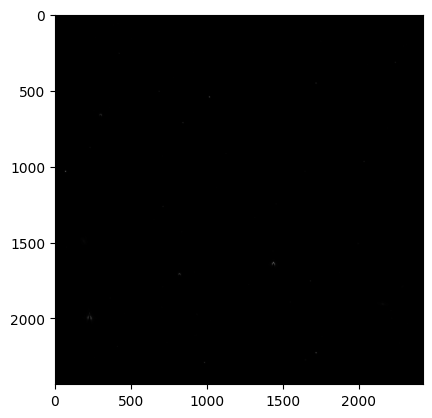

In [30]:
plt.imshow(img_n, cmap='gray') # Dao da pra ver nada, ta muito escuro! rsrsrs
plt.show()

In [31]:
# Correcao de contraste (Processamento de Imagens tem nomes engraçados, rsrsrsrs
# a galera chama isso de 'Equalizacao de Histograma' :)
# Referencias: https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html
img_eq = cv2.equalizeHist(img_n)

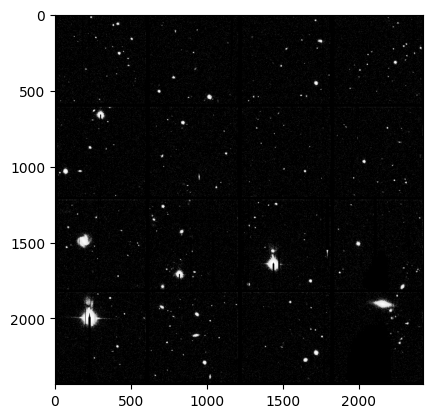

In [32]:
plt.imshow(img_eq, cmap='gray') # Ai sim heim! Agora ligamos a luz! rsrsrs
plt.show()

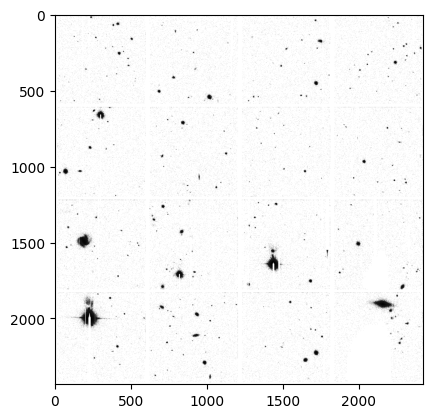

In [33]:
plt.imshow(img_eq, cmap='gray_r') # Plotando a imagem inversa apenas, da para ver que eles existem uma especia de quadrantes feitos artificialmente
plt.show()